In [1]:
######################################################################################################
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pygeohash as pgh
from shapely.geometry import Point, Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
######################################################################################################

### Nearest Health Facility Feature

In [2]:
######################################################################################################
health = gpd.GeoDataFrame(pd.read_csv('Health_Facilities_with_coordinates.csv').dropna(subset=['Latitude', 'Longitude']))
health['geometry'] = health.apply(lambda x: Point(x.Latitude, x.Longitude), axis=1)
health.crs = {'init': 'epsg:32651'}
health = health['geometry']
health

0            POINT (7.1233902 124.5595169)
1            POINT (7.1104598 124.5711212)
2            POINT (7.1935201 124.7447968)
3            POINT (7.2305698 124.8141174)
4            POINT (7.2245598 124.7004471)
                      ...                 
607          POINT (6.0265002 121.8930511)
608          POINT (6.1238098 121.8516769)
609          POINT (6.1515698 121.7967377)
610    POINT (6.149310099999999 121.82827)
611          POINT (6.1476998 121.8277588)
Name: geometry, Length: 386, dtype: object

In [109]:
######################################################################################################
# import barangay dataset
barangay = gpd.read_file(os.getcwd() + 
                         '\\archive\\1 - Geodata\\Administrative\\AdministrativeBoundariesBARMMBarangays20190206PSA2016.shp')

# add PSGC Code
barangay['PSGC_code'] = barangay.apply(lambda x: float(x.Bgy_Code[2:]), axis=1)

# check list of barangays
print('Number of Barangays: ' + str(len(set(barangay['PSGC_code']))))

# get relevant columns
barangay = barangay[['PSGC_code', 'Reg_Name', 'Pro_Name', 'Bgy_Name', 'geometry']]
# barangay[['PSGC_code', 'Pro_Name', 'geometry']].to_file('map.shp', index=False)

Number of Barangays: 2589


C:\Users\johnn\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,PSGC_code,Reg_Name,Pro_Name,Bgy_Name,geometry
0,157001001.0,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Balimbing Proper,"MULTIPOLYGON (((162191.469 562138.624, 162202...."
1,157001002.0,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Batu-batu (Pob.),"POLYGON ((154788.744 561141.297, 154788.577 56..."
2,157001003.0,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Buan,"MULTIPOLYGON (((174430.408 571246.155, 174433...."
3,157001004.0,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Dungon,"POLYGON ((182461.829 575050.555, 182461.151 57..."
4,157001005.0,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Luuk Buntal,"MULTIPOLYGON (((165920.073 551841.163, 165917...."
...,...,...,...,...,...
2584,153818010.0,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),MAGUINDANAO,Togaig,"POLYGON ((647116.139 832017.938, 644563.603 83..."
2585,157005022.0,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,North Larap,"MULTIPOLYGON (((82476.772 523535.035, 82472.09..."
2586,157004010.0,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Maruwa,"MULTIPOLYGON (((147008.552 543086.465, 147007...."
2587,157003001.0,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Boki,"MULTIPOLYGON (((-8638.438 762810.258, -8639.05..."


In [4]:
# get nearest health facility from barangay centroid
######################################################################################################
def getNN(health, centroid):
    return min(health.distance(centroid))
######################################################################################################
# add nearest neighbor feature
barangay['nearest_health'] = barangay.apply(lambda x: min(health.distance(x.geometry.centroid)), axis=1)

# normalize feature
barangay['nearest_health'] = barangay['nearest_health'] / max(barangay['nearest_health'])

# get relevant fetures
barangay = barangay[['PSGC_code', 'nearest_health']]

# save file
barangay.to_csv('barangay_1.csv', index=False)
#barangay.to_file('barangay_1.shp', index=False)

### Plot Feature Values

In [2]:
bangsamoro_complete = gpd.GeoDataFrame(pd.read_csv('bangsamoro_complete.csv').sort_values(by='Bgy_Code'))
barmm_map = (gpd.read_file('map.shp').sort_values(by='PSGC_code'))[['Pro_Name', 'geometry']]

bangsamoro_complete['geometry'] = barmm_map['geometry']
bangsamoro_complete['Pro_Name'] = barmm_map['Pro_Name']
bangsamoro_complete.to_file('final.shp', index=False) 

In [50]:
final['Number of'] = final['Number of'] / max(final['Number of'])
final['Occurence'] = final['Occurence'] / max(final['Occurence'])
final['Number o_1'] = final['Number o_1'] / max(final['Number o_1'])
final['Number o_2'] = final['Number o_2'] / max(final['Number o_2'])
final.to_file('final_complete.shp', index=False)

In [2]:
final = gpd.read_file('final_complete.shp')[['Bgy_Code', 'Number of', 'Occurence', 'Household', 'Access to',
       'Access t_1', 'Owned Hous', 'Has Copy B', 'Married Pr',
       'Overseas W', 'Distance t', 'Percentage', 'Number o_1', 'Number o_2',
       'Pro_Name', 'geometry', 'School Att']]
print('Provinces: ' + str(set(final['Pro_Name'])))
print('Columns: ' + str(final.columns))
province_dict = {'COTABATO (NORTH COTABATO)': 'North Cotabato',
                 'COTABATO CITY (Not a Province)': 'Cotabato City',
                 'BASILAN': 'Basilan',
                 'MAGUINDANAO': 'Maguindanao',
                 'LANAO DEL SUR': 'Lanao del Sur',
                 'TAWI-TAWI': 'Tawi-Tawi',
                 'SULU': 'Sulu'}
feature_dict = {'Occurence': ['Occurence of Armed Conflict in ', 'armed_conflict'],
              'Household': ['Household with Concrete Walls in ', 'concrete_walls'],
              'Access to': ['Access to Electricity in ', 'electricity'],
              'Access t_1': ['Access to Treated Water in ', 'water'],
              'Owned Hous': ['Owned House and Lot in ', 'house_lot'],
              'Has Copy B': ['Birth Registration in ', 'birth_cert'],
              'Married Pr': ['Married Proportion (6-24 yrs. old) in ', 'marriage'],
              'School Att': ['School Attendance (6-24 yrs. old) in ', 'school_attendance'],
              'Overseas W': ['Overseas Worker in Family Proportion in ', 'ofw'], 
              'Distance t': ['Distance to Nearest Health Facility in ', 'nearest_health'], 
              'Percentage': ['Employment Percentage (15-19 yrs. old) in ', 'employment'], 
              'Number o_1': ['Number of High Schools in ', 'high_school'], 
              'Number o_2': ['Number of Elementary Schools and Below in ', 'elem_school']}

Provinces: {'SULU', 'COTABATO (NORTH COTABATO)', 'TAWI-TAWI', 'COTABATO CITY (Not a Province)', 'MAGUINDANAO', 'LANAO DEL SUR', 'BASILAN'}
Columns: Index(['Bgy_Code', 'Number of', 'Occurence', 'Household', 'Access to',
       'Access t_1', 'Owned Hous', 'Has Copy B', 'Married Pr', 'Overseas W',
       'Distance t', 'Percentage', 'Number o_1', 'Number o_2', 'Pro_Name',
       'geometry', 'School Att'],
      dtype='object')


In [3]:
final.head()

,Bgy_Code,Number of,Occurence,Household,Access to,Access t_1,Owned Hous,Has Copy B,Married Pr,Overseas W,Distance t,Percentage,Number o_1,Number o_2,Pro_Name,geometry,School Att
0,124702010,0.25,1.0,0.297401,0.425552,0.003842,0.958694,0.749897,0.151403,0.133525,0.944123,0.0,0.0,0.0,TAWI-TAWI,"MULTIPOLYGON (((162191.469 562138.624, 162202....",0.617923
1,124702015,0.00,1.0,0.239592,0.479183,0.041634,0.554595,0.605769,0.177013,0.100629,0.951451,0.0,0.0,0.0,TAWI-TAWI,"POLYGON ((154788.744 561141.297, 154788.577 56...",0.626033
2,124702016,0.25,1.0,0.053498,0.343621,0.012346,0.985597,0.440871,0.204357,0.037037,0.952152,0.0,0.0,0.0,TAWI-TAWI,"MULTIPOLYGON (((174430.408 571246.155, 174433....",0.531568
3,124702024,0.00,1.0,0.246277,0.878580,0.002291,0.557847,0.718328,0.157014,0.104238,0.949756,0.0,0.0,0.0,TAWI-TAWI,"POLYGON ((182461.829 575050.555, 182461.151 57...",0.622533
4,124702027,0.00,1.0,0.218845,0.419453,0.009119,0.641337,0.545221,0.148172,0.065350,0.943392,0.0,0.0,0.0,TAWI-TAWI,"MULTIPOLYGON (((165920.073 551841.163, 165917....",0.514286


In [4]:
def continuous_to_discrete(variable):
    if variable <= 0.33:
        return 1
    elif variable <= 0.66:
        return 2
    else:
        return 3

for i in list(final.columns)[1:14]:
    try:
        final[i] = final.apply(lambda x: [continuous_to_discrete(x['School Att']), continuous_to_discrete(x[i])], axis=1)
    except:
        pass
final

,Bgy_Code,Number of,Occurence,Household,Access to,Access t_1,Owned Hous,Has Copy B,Married Pr,Overseas W,Distance t,Percentage,Number o_1,Number o_2,Pro_Name,geometry,School Att
0,124702010,"[2, 1]","[2, 3]","[2, 1]","[2, 2]","[2, 1]","[2, 3]","[2, 3]","[2, 1]","[2, 1]","[2, 3]","[2, 1]","[2, 1]","[2, 1]",TAWI-TAWI,"MULTIPOLYGON (((162191.469 562138.624, 162202....",0.617923
1,124702015,"[2, 1]","[2, 3]","[2, 1]","[2, 2]","[2, 1]","[2, 2]","[2, 2]","[2, 1]","[2, 1]","[2, 3]","[2, 1]","[2, 1]","[2, 1]",TAWI-TAWI,"POLYGON ((154788.744 561141.297, 154788.577 56...",0.626033
2,124702016,"[2, 1]","[2, 3]","[2, 1]","[2, 2]","[2, 1]","[2, 3]","[2, 2]","[2, 1]","[2, 1]","[2, 3]","[2, 1]","[2, 1]","[2, 1]",TAWI-TAWI,"MULTIPOLYGON (((174430.408 571246.155, 174433....",0.531568
3,124702024,"[2, 1]","[2, 3]","[2, 1]","[2, 3]","[2, 1]","[2, 2]","[2, 3]","[2, 1]","[2, 1]","[2, 3]","[2, 1]","[2, 1]","[2, 1]",TAWI-TAWI,"POLYGON ((182461.829 575050.555, 182461.151 57...",0.622533
4,124702027,"[2, 1]","[2, 3]","[2, 1]","[2, 2]","[2, 1]","[2, 2]","[2, 2]","[2, 1]","[2, 1]","[2, 3]","[2, 1]","[2, 1]","[2, 1]",TAWI-TAWI,"MULTIPOLYGON (((165920.073 551841.163, 165917....",0.514286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2584,157011012,"[2, 1]","[2, 1]","[2, 1]","[2, 3]","[2, 1]","[2, 3]","[2, 3]","[2, 1]","[2, 1]","[2, 2]","[2, 1]","[2, 1]","[2, 1]",MAGUINDANAO,"POLYGON ((647116.139 832017.938, 644563.603 83...",0.621107
2585,157011013,"[2, 1]","[2, 1]","[2, 1]","[2, 3]","[2, 3]","[2, 2]","[2, 3]","[2, 1]","[2, 1]","[2, 2]","[2, 1]","[2, 1]","[2, 1]",TAWI-TAWI,"MULTIPOLYGON (((82476.772 523535.035, 82472.09...",0.649248
2586,157011014,"[2, 1]","[2, 1]","[2, 1]","[2, 3]","[2, 1]","[2, 3]","[2, 2]","[2, 1]","[2, 1]","[2, 2]","[2, 1]","[2, 1]","[2, 1]",TAWI-TAWI,"MULTIPOLYGON (((147008.552 543086.465, 147007....",0.591049
2587,157011015,"[2, 1]","[2, 1]","[2, 1]","[2, 3]","[2, 1]","[2, 3]","[2, 1]","[2, 1]","[2, 1]","[2, 2]","[2, 1]","[2, 1]","[2, 1]",TAWI-TAWI,"MULTIPOLYGON (((-8638.438 762810.258, -8639.05...",0.650000


In [11]:
# 1, 1 --lavenderblush  # 2, 2 -- powerblue
# 2, 1 --pink           # 3, 3 -- cadetblue
# 3, 1 --hotpink        # 2, 3 -- mediumaquamarine
# 1, 2 --palegreen      # 3, 2 -- plum
# 1, 3 --mediumspringgreen

In [5]:
def discrete_to_color(variables):
    if variables == [1, 1]:
        return 'lavenderblush'
    elif variables == [1, 2]:
        return 'palegreen'
    elif variables == [1, 3]:
        return 'mediumspringgreen'
    elif variables == [2, 1]:
        return 'pink'
    elif variables == [3, 1]:
        return 'hotpink'
    elif variables == [2, 2]:
        return 'powderblue'
    elif variables == [3, 3]:
        return 'cadetblue'
    elif variables == [2, 3]:
        return 'mediumaquamarine'
    elif variables == [3, 2]:
        return 'plum'

for i in list(final.columns)[1:14]:
    final[i] = final.apply(lambda x: discrete_to_color(x[i]), axis=1)

final

,Bgy_Code,Number of,Occurence,Household,Access to,Access t_1,Owned Hous,Has Copy B,Married Pr,Overseas W,Distance t,Percentage,Number o_1,Number o_2,Pro_Name,geometry,School Att
0,124702010,pink,mediumaquamarine,pink,powderblue,pink,mediumaquamarine,mediumaquamarine,pink,pink,mediumaquamarine,pink,pink,pink,TAWI-TAWI,"MULTIPOLYGON (((162191.469 562138.624, 162202....",0.617923
1,124702015,pink,mediumaquamarine,pink,powderblue,pink,powderblue,powderblue,pink,pink,mediumaquamarine,pink,pink,pink,TAWI-TAWI,"POLYGON ((154788.744 561141.297, 154788.577 56...",0.626033
2,124702016,pink,mediumaquamarine,pink,powderblue,pink,mediumaquamarine,powderblue,pink,pink,mediumaquamarine,pink,pink,pink,TAWI-TAWI,"MULTIPOLYGON (((174430.408 571246.155, 174433....",0.531568
3,124702024,pink,mediumaquamarine,pink,mediumaquamarine,pink,powderblue,mediumaquamarine,pink,pink,mediumaquamarine,pink,pink,pink,TAWI-TAWI,"POLYGON ((182461.829 575050.555, 182461.151 57...",0.622533
4,124702027,pink,mediumaquamarine,pink,powderblue,pink,powderblue,powderblue,pink,pink,mediumaquamarine,pink,pink,pink,TAWI-TAWI,"MULTIPOLYGON (((165920.073 551841.163, 165917....",0.514286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2584,157011012,pink,pink,pink,mediumaquamarine,pink,mediumaquamarine,mediumaquamarine,pink,pink,powderblue,pink,pink,pink,MAGUINDANAO,"POLYGON ((647116.139 832017.938, 644563.603 83...",0.621107
2585,157011013,pink,pink,pink,mediumaquamarine,mediumaquamarine,powderblue,mediumaquamarine,pink,pink,powderblue,pink,pink,pink,TAWI-TAWI,"MULTIPOLYGON (((82476.772 523535.035, 82472.09...",0.649248
2586,157011014,pink,pink,pink,mediumaquamarine,pink,mediumaquamarine,powderblue,pink,pink,powderblue,pink,pink,pink,TAWI-TAWI,"MULTIPOLYGON (((147008.552 543086.465, 147007....",0.591049
2587,157011015,pink,pink,pink,mediumaquamarine,pink,mediumaquamarine,pink,pink,pink,powderblue,pink,pink,pink,TAWI-TAWI,"MULTIPOLYGON (((-8638.438 762810.258, -8639.05...",0.650000


In [6]:
final.to_file('final_color.shp', index=False)

In [2]:
final_color = gpd.read_file('final_color.shp')
final_color.head()

feature_dict = {'Occurence': ['Occurence of Armed Conflict in ', 'armed_conflict'],
              'Household': ['Household with Concrete Walls in ', 'concrete_walls'],
              'Access to': ['Access to Electricity in ', 'electricity'],
              'Access t_1': ['Access to Treated Water in ', 'water'],
              'Owned Hous': ['Owned House and Lot in ', 'house_lot'],
              'Has Copy B': ['Birth Registration in ', 'birth_cert'],
              'Married Pr': ['Married Proportion (6-24 yrs. old) in ', 'marriage'],
              'Overseas W': ['Overseas Worker in Family Proportion in ', 'ofw'], 
              'Distance t': ['Distance to Nearest Health Facility in ', 'nearest_health'], 
              'Percentage': ['Employment Percentage (15-19 yrs. old) in ', 'employment'], 
              'Number o_1': ['Number of High Schools in ', 'high_school'], 
              'Number o_2': ['Number of Elementary Schools and Below in ', 'elem_school']}

In [ ]:
# 680000, 730000 -- maguindanao #
# 430000, 695000 -- basilan #
# 630000, 789000 -- cotabato city #
# 705000, 769000 -- north cotabato #
# 680000, 820000 -- lanao del sur #
# 200000, 765000 -- tawi-tawi #
# 375000, 605000 -- sulu

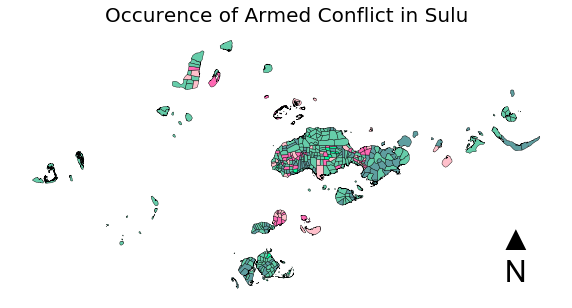

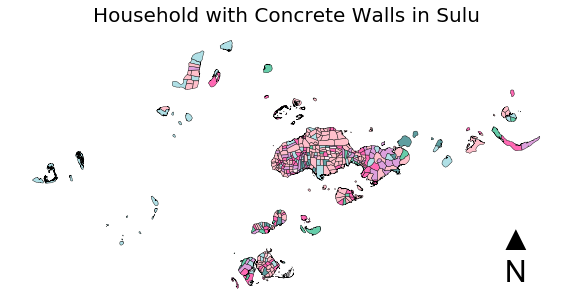

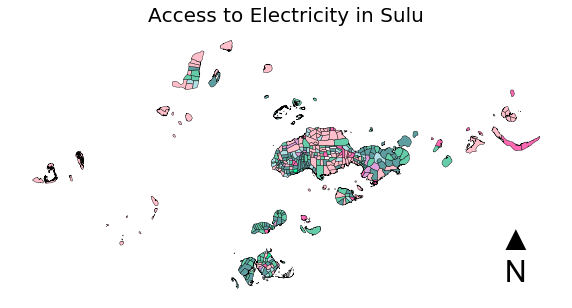

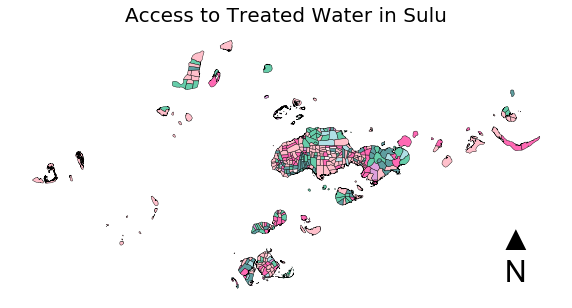

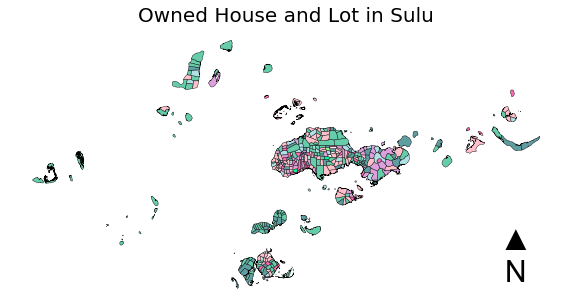

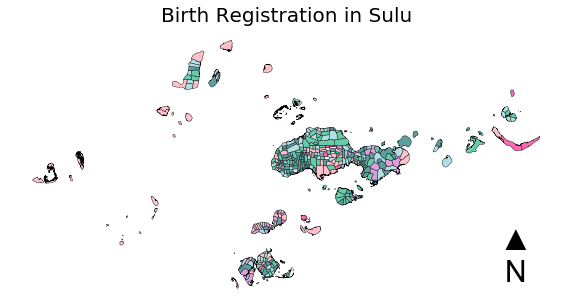

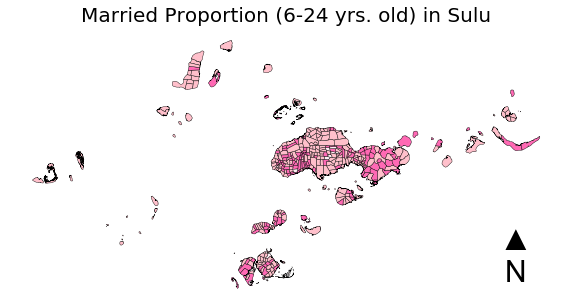

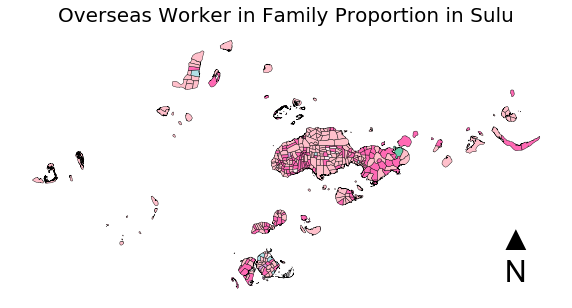

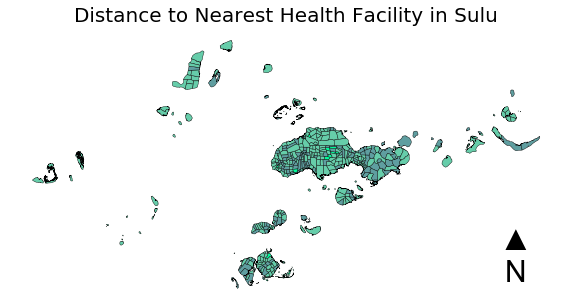

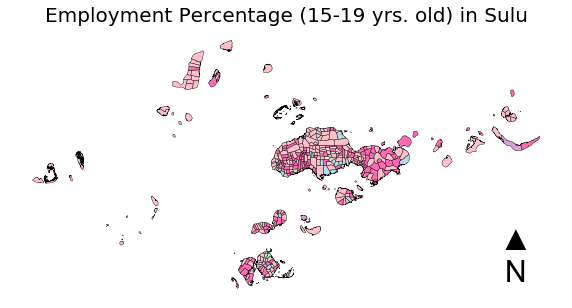

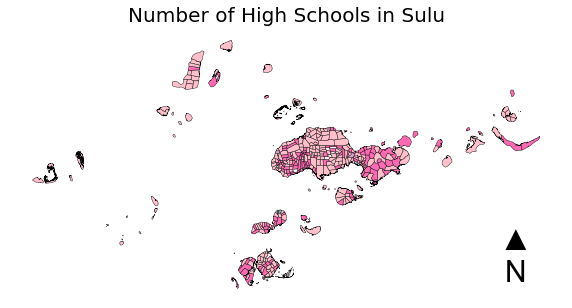

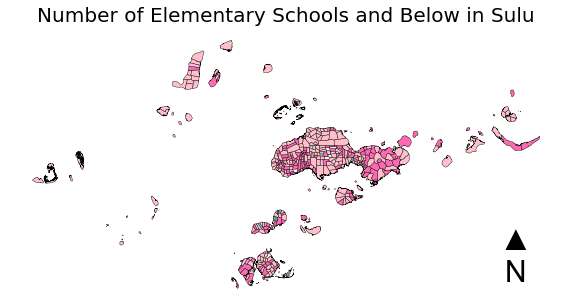

In [13]:
def plot_map(final, province, title, column, file):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title(title, size=20)
    ax.set_axis_off()
    final[final['Pro_Name'] == province].plot(color=final[column], ax=ax, edgecolor='black', linewidth=0.4)
    ax.text(375000, 605000,u'\u25B2 \nN ', ha='center', fontsize=30, family='Arial')
    plt.savefig(file, dpi=500, format='png')

for column, name in feature_dict.items():
    plot_map(final_color,'SULU', 
                 name[0] + 'Sulu', 
                 column,
                 name[1] + '_sulu_bivariate.png')


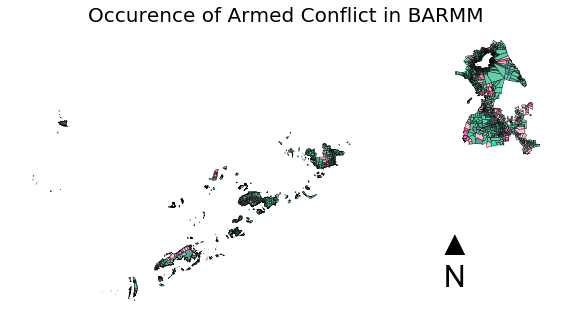

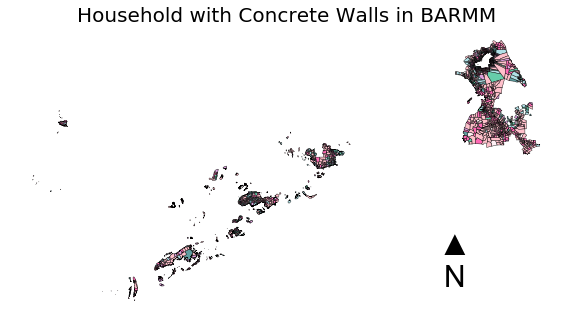

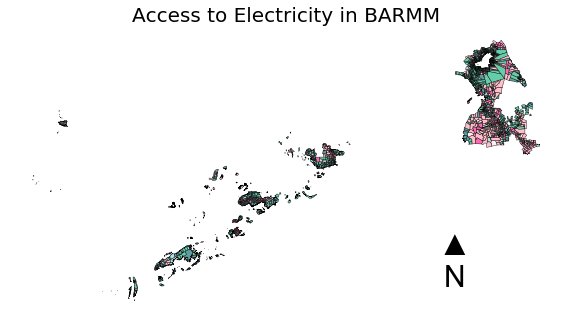

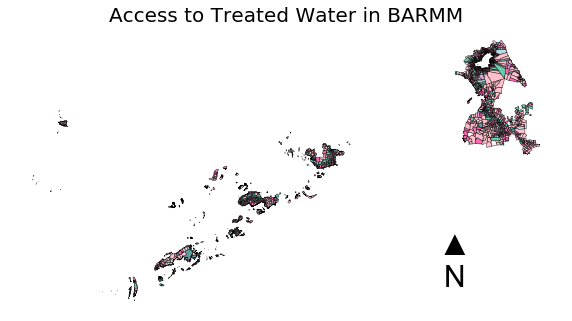

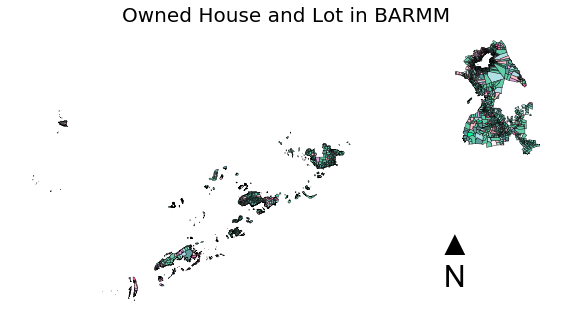

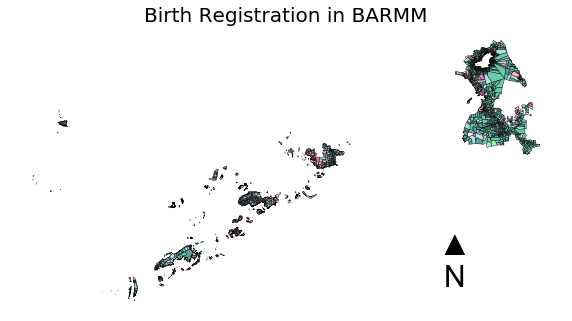

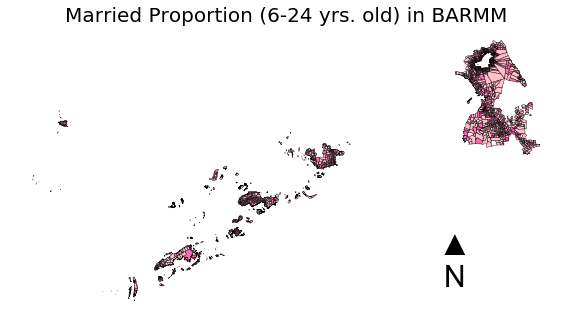

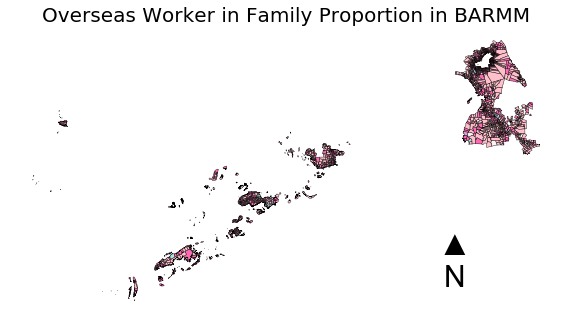

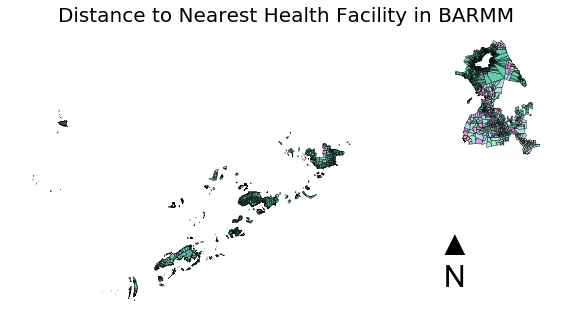

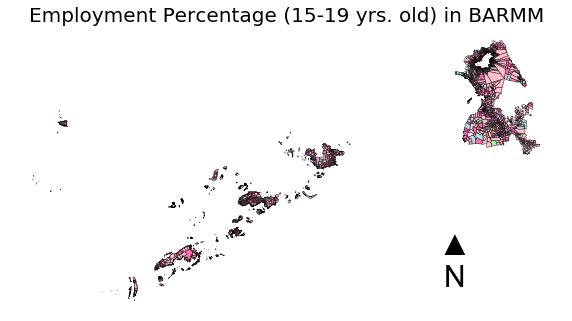

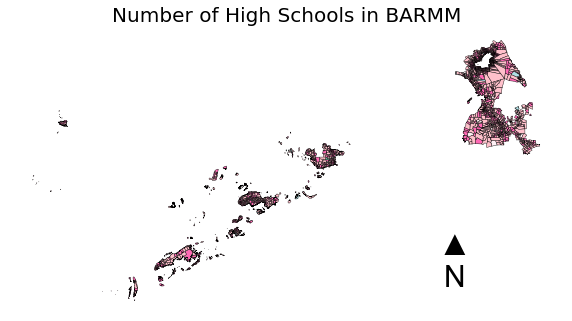

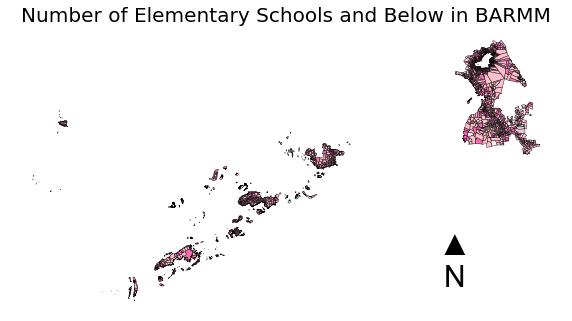

In [14]:
def plot_map(final, title, column, file):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title(title, size=20)
    ax.set_axis_off()
    final.plot(color=final[column], ax=ax, edgecolor='black', linewidth=0.4)
    ax.text(600000, 530000,u'\u25B2 \nN ', ha='center', fontsize=30, family='Arial')
    plt.savefig(file, dpi=500, format='png')

    
for column, name in feature_dict.items():
    plot_map(final_color,
              name[0] + 'BARMM',
              column,
              name[1] + '_barmm_bivariate.png')

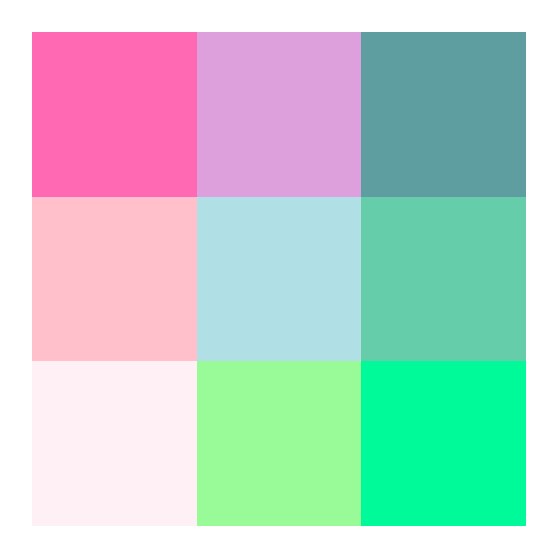

In [143]:
box11 = np.array([[1,1],[1,2],[2,2],[2,1]])
box12 = box11 + 1

df = gpd.GeoDataFrame(pd.DataFrame([[1, 1],[1, 1],[1, 1],[1, 1],[1, 1],[1, 1],[1, 1],[1, 1],[1, 1]], 
                  columns=['color','geometry']))
df['color'] = ['lavenderblush', 'powderblue', 'cadetblue', 'palegreen', 'mediumspringgreen','pink', 'hotpink','mediumaquamarine','plum']
df.iloc[0, 1] = Polygon(np.array([[1,1],[1,2],[2,2],[2,1]])) 
df.iloc[1, 1] = Polygon(np.array([[1,1],[1,2],[2,2],[2,1]]) + 1) 
df.iloc[2, 1] = Polygon(np.array([[1,1],[1,2],[2,2],[2,1]]) + 2) 
df.iloc[3, 1] = Polygon(np.array([[2,1],[2,2],[3,2],[3,1]])) 
df.iloc[4, 1] = Polygon(np.array([[3,1],[3,2],[4,2],[4,1]])) 
df.iloc[5, 1] = Polygon(np.array([[1,2],[1,3],[2,3],[2,2]])) 
df.iloc[6, 1] = Polygon(np.array([[1,3],[1,4],[2,4],[2,3]])) 
df.iloc[7, 1] = Polygon(np.array([[4,2],[3,2],[3,3],[4,3]])) 
df.iloc[8, 1] = Polygon(np.array([[2,4],[2,3],[3,3],[3,4]])) 

fig, ax = plt.subplots(figsize=(10,10))
#ax.set_title(title, size=20)
ax.set_axis_off()
df.plot(color=df['color'], ax=ax)
plt.savefig('legend_bivariate.png', dpi=500, format='png')

In [ ]:
# 680000, 730000 -- maguindanao #
# 430000, 695000 -- basilan #
# 630000, 789000 -- cotabato city #
# 705000, 769000 -- north cotabato #
# 680000, 820000 -- lanao del sur #
# 200000, 765000 -- tawi-tawi #
# 375000, 605000 -- sulu

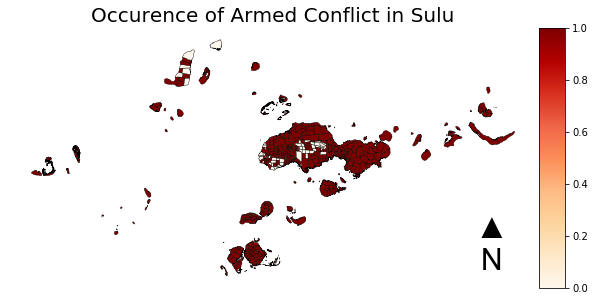

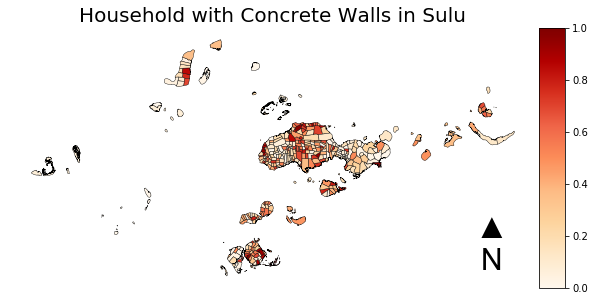

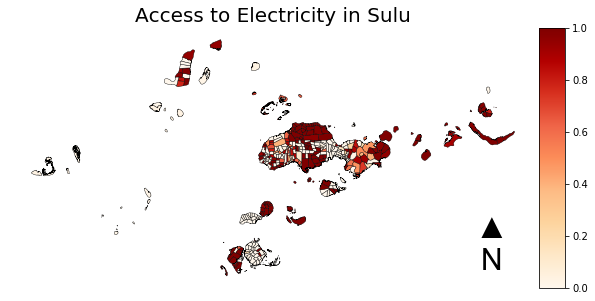

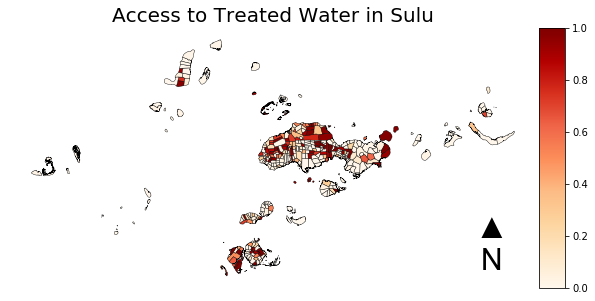

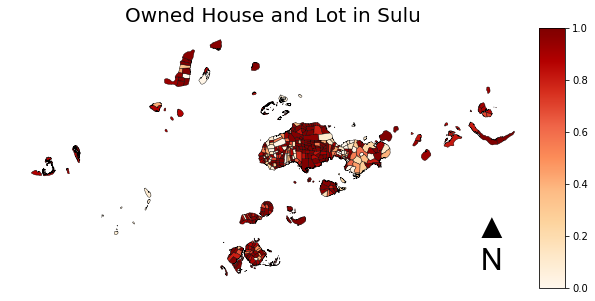

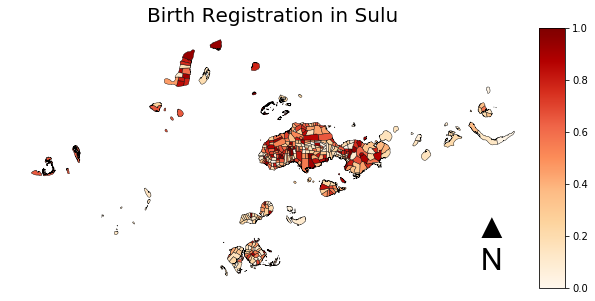

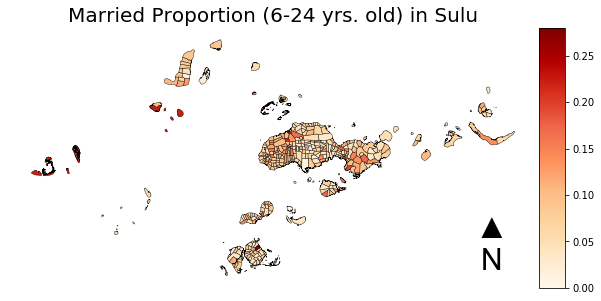

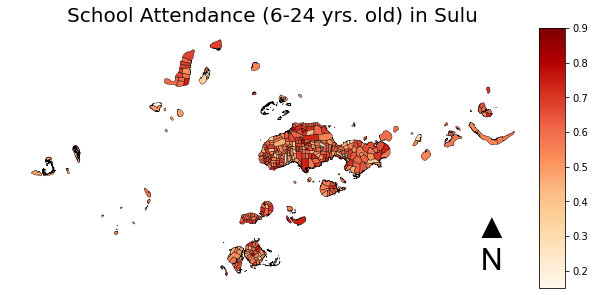

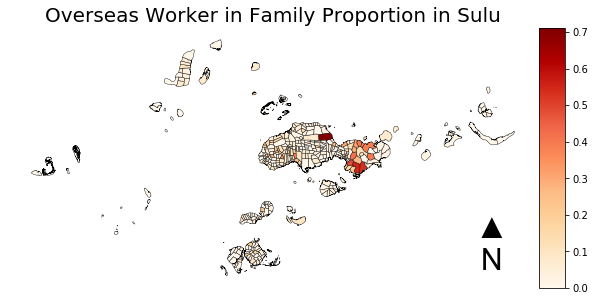

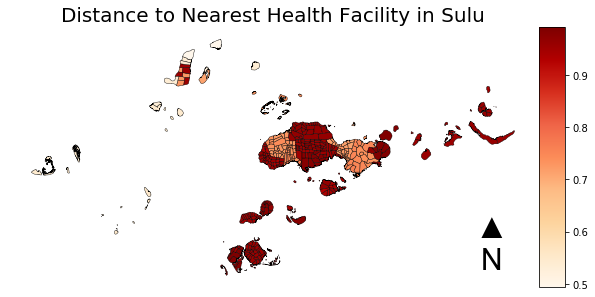

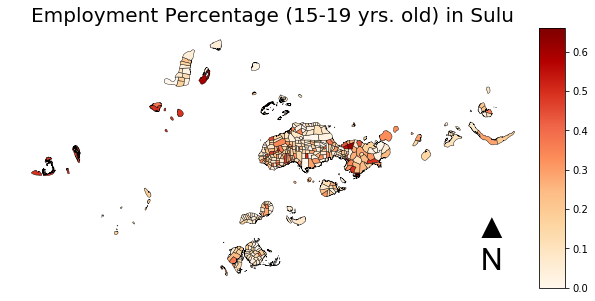

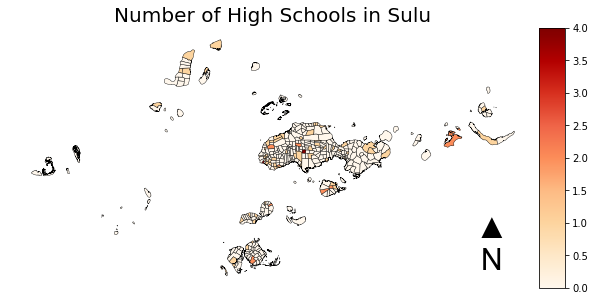

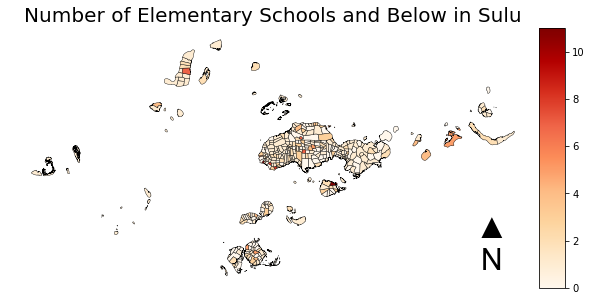

In [74]:
def plot_map(final, province, title, column, file):
    fig, ax = plt.subplots(figsize=(10,10))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%")
    ax.set_title(title, size=20)
    ax.set_axis_off()
    final[final['Pro_Name'] == province].plot(column=column, cmap='OrRd', ax=ax, legend=True,cax=cax, 
                                              edgecolor='black', linewidth=0.4)
    ax.text(375000, 605000,u'\u25B2 \nN ', ha='center', fontsize=30, family='Arial')
    plt.savefig(file, dpi=500, format='png')

for column, name in feature_dict.items():
    plot_map(final,
             'SULU', 
              name[0] + 'Sulu',
              column,
              name[1] + '_sulu.png')


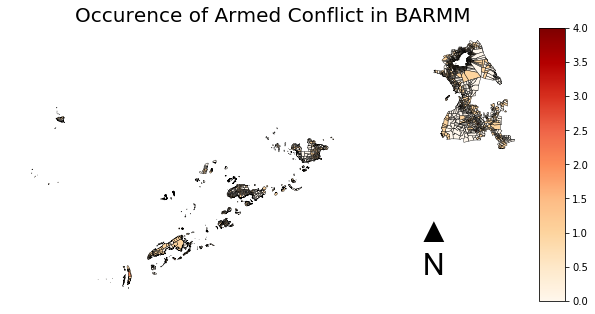

In [9]:
def plot_map(final, title, column, file):
    fig, ax = plt.subplots(figsize=(10,10))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%")
    ax.set_title(title, size=20)
    ax.set_axis_off()
    final.plot(column=column, cmap='OrRd', ax=ax, legend=True,cax=cax, 
                                              edgecolor='black', linewidth=0.4)
    ax.text(600000, 530000,u'\u25B2 \nN ', ha='center', fontsize=30, family='Arial')
    #plt.savefig(file, dpi=500, format='png')
    
for column, name in feature_dict.items():
    plot_map(final,
              name[0] + 'BARMM',
              ['Number of', 'Occurence'],
              name[1] + '_barmm.png')
    break

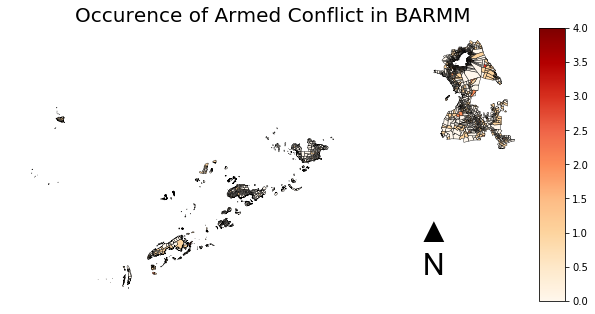

In [10]:
for column, name in feature_dict.items():
    plot_map(final,
              name[0] + 'BARMM',
              ['Number of'],
              name[1] + '_barmm.png')
    break

### Attempt Geohash 

In [3]:
# barangay.plot(figsize=(20,20))

In [4]:
# reference = gpd.read_file(os.getcwd() + '\\archive\\7 - Reference\\Reference.shp')[['NAME_1', 'NAME_3', 'REGION', 'geometry']]\
#             .rename(columns={'NAME_1':'Pro_Name', 'NAME_3':'Bgy_Name'})
# reference = reference[reference['REGION'] == 'Autonomous Region of Muslim Mindanao (ARMM)']
# reference.head()

In [5]:
# df1 = barangay[barangay['Pro_Name'] == 'LANAO DEL SUR'][['PSGC_code', 'Bgy_Name', 'area','geometry']]
# df2 = reference[reference['Pro_Name'] == 'Lanao del Sur'][['Bgy_Name', 'geometry']]

In [6]:
# df1.plot(figsize=(30,30))

In [7]:
# df2.plot(figsize=(10,10))

In [8]:
# common_bgy = list(set(df1['Bgy_Name']).intersection(df2['Bgy_Name']))[0]
# #x1, y1 = df1[df1['Bgy_Name'] == common_bgy].iloc[0, 1].exterior.coords.xy
# #x2, y2 = df2[df2['Bgy_Name'] == common_bgy].iloc[0, 1].exterior.coords.xy
# df1[df1['Bgy_Name'] == 'Ambolong'].iloc[0, 3]

In [9]:
# df2[df2['Bgy_Name'] == 'Ambolong'].iloc[0, 1]

In [10]:
# # true coordinates 157001005 is for 4.9778, 119.9939 
# c = [167780.654705735/4.9778, 551385.8742704596/119.9939] 
# print('Divide Lat and Long by: ' + str(c[0]) + ', ' + str(c[1]))
# barangay['geometry'][4]

In [19]:
# # get centroid of each shapefile, for now...
# barangay['centroid'] = barangay.apply(lambda x: x.geometry.centroid, axis=1)
# barangay.head()

,PSGC_code,Reg_Name,Pro_Name,Bgy_Name,area,geometry,centroid
0,157001001,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Balimbing Proper,1.497005e+07,"MULTIPOLYGON (((162191.469 562138.624, 162202....",POINT (163508.8472880501 564237.5866664612)
1,157001002,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Batu-batu (Pob.),8.152629e+06,"POLYGON ((154788.744 561141.297, 154788.577 56...",POINT (154348.5208267272 563590.2214992745)
2,157001003,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Buan,4.673122e+07,"MULTIPOLYGON (((174430.408 571246.155, 174433....",POINT (167445.1580363923 570867.6763768467)
3,157001004,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Dungon,5.462780e+07,"POLYGON ((182461.829 575050.555, 182461.151 57...",POINT (181102.5270247771 577459.6241759483)
4,157001005,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Luuk Buntal,6.210445e+06,"MULTIPOLYGON (((165920.073 551841.163, 165917....",POINT (167780.654705735 551385.8742704596)


In [21]:
barangay['true_centroid'] = barangay.apply(lambda x: Point(x.centroid.x*c[0], x.centroid.y*c[1]), axis=1)
barangay

,PSGC_code,Reg_Name,Pro_Name,Bgy_Name,area,geometry,centroid,true_centroid
0,157001001,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Balimbing Proper,1.497005e+07,"MULTIPOLYGON (((162191.469 562138.624, 162202....",POINT (163508.8472880501 564237.5866664612),POINT (5.388375264472574 120.0275108357461)
1,157001002,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Batu-batu (Pob.),8.152629e+06,"POLYGON ((154788.744 561141.297, 154788.577 56...",POINT (154348.5208267272 563590.2214992745),POINT (5.086500000000001 119.8898)
2,157001003,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Buan,4.673122e+07,"MULTIPOLYGON (((174430.408 571246.155, 174433....",POINT (167445.1580363923 570867.6763768467),POINT (5.518094969683868 121.4378974944174)
3,157001004,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Dungon,5.462780e+07,"POLYGON ((182461.829 575050.555, 182461.151 57...",POINT (181102.5270247771 577459.6241759483),POINT (5.968168653495876 122.8401704102645)
4,157001005,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Luuk Buntal,6.210445e+06,"MULTIPOLYGON (((165920.073 551841.163, 165917....",POINT (167780.654705735 551385.8742704596),POINT (5.529151141777202 117.293628717076)
...,...,...,...,...,...,...,...,...
2584,153818010,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),MAGUINDANAO,Togaig,2.203007e+07,"POLYGON ((647116.139 832017.938, 644563.603 83...",POINT (643995.2049306659 834336.5476004443),POINT (21.22263039732746 177.4843459107753)
2585,157005022,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,North Larap,4.289994e+06,"MULTIPOLYGON (((82476.772 523535.035, 82472.09...",POINT (101954.6922444561 527463.1595809767),POINT (3.359880219931629 112.2046662578811)
2586,157004010,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Maruwa,1.876906e+06,"MULTIPOLYGON (((147008.552 543086.465, 147007....",POINT (147615.3665986212 544414.3212864152),POINT (4.864611323660119 115.8106042410249)
2587,157003001,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Boki,2.735266e+06,"MULTIPOLYGON (((-8638.438 762810.258, -8639.05...",POINT (-3236.085790547501 771076.7861025971),POINT (-0.1066440435285957 164.0274052742807)


In [20]:
# Batu Batu --154348.5208267272 563590.2214992745 --> 5.0865, 119.8898
c = [5.0865/154348.5208267272, 119.8898/563590.2214992745]
c

[3.295464039924388e-05, 0.00021272512443716045]

In [50]:
# convert (lat long) to geohash
barangay['geohash'] = barangay.apply(lambda x: Geohash.encode(x.true_centroid.x, x.true_centroid.y, precision=10), axis=1)
barangay['geohash_centroid_x'] = barangay.apply(lambda x: Geohash.decode_exactly(x.geohash), axis=1)
barangay['geohash_centroid_y'] = barangay.apply(lambda x: Geohash.decode(x.geohash)[1], axis=1)
barangay.head()

,Bgy_Code,geometry,PSGC_code,centroid,true_centroid,area,geohash,geohash_centroid,geohash_centroid_x,geohash_centroid_y
0,PH157001001,"MULTIPOLYGON (((162191.469 562138.624, 162202....",157001001,POINT (163508.8472880501 564237.5866664612),POINT (4.851061890644982 122.7907200928523),1.497005e+07,w8z7d5j7rp,"[4.851064682006836, 122.79058456420898]","(4.851061999797821, 122.79071867465973, 2.6822...",122.790719
1,PH157001002,"POLYGON ((154788.744 561141.297, 154788.577 56...",157001002,POINT (154348.5208267272 563590.2214992745),POINT (4.579288764362061 122.6498389517863),8.152629e+06,w8z4ncwuk3,"[4.579324722290039, 122.64982223510742]","(4.5792898535728455, 122.64983832836151, 2.682...",122.649838
2,PH157001003,"MULTIPOLYGON (((174430.408 571246.155, 174433....",157001003,POINT (167445.1580363923 570867.6763768467),POINT (4.967846317773743 124.2335759200018),4.673122e+07,wbbk7025u1,"[4.967794418334961, 124.23357009887695]","(4.967845380306244, 124.23357546329498, 2.6822...",124.233575
3,PH157001004,"POLYGON ((182461.829 575050.555, 182461.151 57...",157001004,POINT (181102.5270247771 577459.6241759483),POINT (5.373039940778829 125.6681312140727),5.462780e+07,wbcqedhspx,"[5.373086929321289, 125.66797256469727]","(5.373041331768036, 125.66812813282013, 2.6822...",125.668128
4,PH157001005,"MULTIPOLYGON (((165920.073 551841.163, 165917....",157001005,POINT (167780.654705735 551385.8742704596),POINT (4.9778 119.9939),6.210445e+06,w8vk6d0vu9,"[4.977750778198242, 119.99387741088867]","(4.977801740169525, 119.99390423297882, 2.6822...",119.993904
